In [1]:
from perceptron import Perceptron
import numpy as np

In [2]:
a = (np.random.rand(2000,2)*2)
a

array([[1.77863623, 1.5597296 ],
       [0.76375551, 0.90986661],
       [0.90237173, 0.77937897],
       ...,
       [1.56933124, 1.9315289 ],
       [0.23985235, 0.73397826],
       [1.81087984, 0.12121471]])

In [3]:
b = -2*(np.random.rand(2000,2))
b

array([[-0.37895819, -1.17549709],
       [-0.80414629, -0.03366063],
       [-0.03808061, -1.2029066 ],
       ...,
       [-0.12139947, -0.21785652],
       [-1.66679802, -1.89335196],
       [-0.76620359, -1.82048843]])

<IPython.core.display.Javascript object>


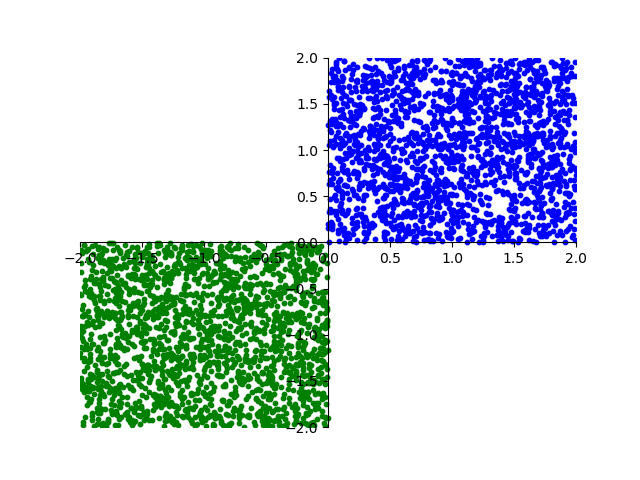

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
for x in a:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b:
    plt.scatter(x[0],x[1], s=10, c="green")
plt.show()

In [5]:
percx = []
for i in range(0,1000,1):
    percx.append(Perceptron(0.3,2))

In [6]:
for perc in percx:
    print(perc.wektor_wspol_w)

[ 0.88812082  0.43112001 -0.09047646]
[-0.14514656  0.09468604  0.13443143]
[0.87074834 0.44155244 0.36127235]
[-0.1275401  -0.62453328  0.30206087]
[-0.93879297  0.48366236 -0.63464877]
[0.9673656  0.59738927 0.55365665]
[ 0.82135163  0.83936492 -0.61207129]
[-0.6325011   0.84038509  0.36009306]
[-0.01218607  0.91945159  0.57163432]
[-0.00838707  0.26123035  0.40944582]
[ 0.20331183 -0.12885857 -0.39606083]
[-0.05385321  0.29058331 -0.60858395]
[-0.41469539  0.446262   -0.47849838]
[0.85705099 0.30618017 0.53625883]
[ 0.84443758 -0.24231355  0.05689848]
[0.09668231 0.07510943 0.20438724]
[ 0.13636153  0.64869549 -0.59004154]
[ 0.19178181 -0.84314614  0.99349988]
[-0.48026388  0.14496384  0.54490146]
[-0.66339776  0.9301597   0.73959225]
[ 0.6150564   0.66765394 -0.38099729]
[ 0.67254727 -0.1858552   0.20815061]
[ 0.01131141  0.52902007 -0.62905423]
[0.10194494 0.39807516 0.11868414]
[-0.50640945  0.04331475 -0.00628525]
[-0.70454047 -0.73249287 -0.82454515]
[-0.24915953 -0.67006983 -0

[ 0.06751333 -0.96365278  0.05928096]
[-0.34078641 -0.34383529  0.28669175]
[0.20076388 0.74176483 0.0208867 ]
[0.16311685 0.7078051  0.45593925]
[ 0.29280669  0.80823363 -0.0075957 ]
[ 0.66108814 -0.46171133  0.59104833]
[ 0.83881398 -0.48626585 -0.41148815]
[0.6173828  0.26670637 0.63687596]
[ 0.06917928  0.65741909 -0.5721829 ]
[-0.39631658  0.23417588  0.22841622]
[-0.76782608  0.47100202 -0.02440089]
[ 0.23074352 -0.09027652  0.11454964]
[ 0.25041371  0.07278328 -0.97349478]
[ 0.70682811 -0.35497366 -0.08800104]
[-0.3826193   0.76086102 -0.50948256]
[-0.56103759 -0.84621464 -0.30053469]
[-0.25209219 -0.09724616 -0.69658534]
[-0.25619207  0.80309997  0.05673401]
[-0.95001188  0.28971448  0.76444183]
[ 0.24728453  0.61850071 -0.22192022]
[-0.4017643  -0.15529403  0.97974038]
[-0.23254291  0.59228964 -0.68679899]
[-0.07257233 -0.94638139 -0.11027274]
[ 0.08161104 -0.95026666 -0.17686174]
[-0.10836053  0.68846759 -0.35206186]
[-0.39741641 -0.17591692  0.75094163]
[-0.47160442 -0.04193

<IPython.core.display.Javascript object>


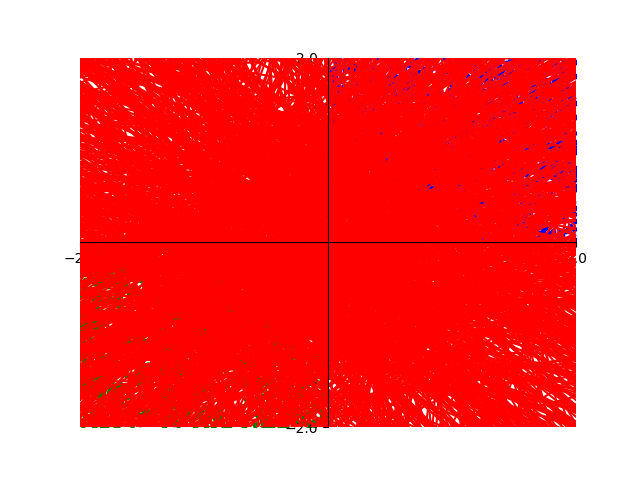

In [7]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for perc in percx:
    wsp_a = -perc.wektor_wspol_w[1]/perc.wektor_wspol_w[2]
    wsp_b = -perc.wektor_wspol_w[0]/perc.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r', label='y=2x+1')
for x in a:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [11]:

for perc in percx:
    perc.mi = 2
    for i in range(0,2000,1):
        perc.uczenie(b[i], 0)
        perc.uczenie(a[i],1)


<IPython.core.display.Javascript object>


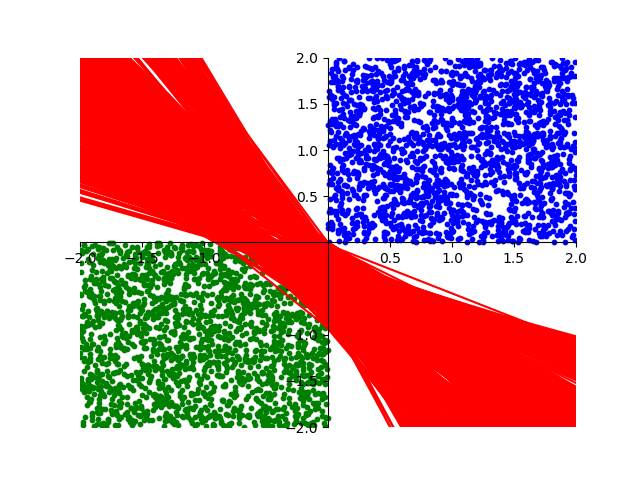

In [12]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)

x = np.linspace(-2,2,20)

for perc in percx:
    wsp_a = -perc.wektor_wspol_w[1]/perc.wektor_wspol_w[2]
    wsp_b = -perc.wektor_wspol_w[0]/perc.wektor_wspol_w[2]
    plt.plot(x, wsp_a*x+wsp_b, '-r', label='y=2x+1')
for x in a:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b:
    plt.scatter(x[0],x[1], s=10, c="green")

plt.show()

In [10]:
perc.mi = 2
for i in range(0,2000,1):
    perc.uczenie(b[i], 0)
    perc.uczenie(a[i],1)

In [201]:
perc.mi = 2
for i in range(10,60,1):
    perc.uczenie(b[i], 0)
    perc.uczenie(a[i],1)

In [198]:
perc.mi = 2
for i in range(40,100,1):
    perc.uczenie(b[i], 0)
    perc.uczenie(a[i],1)

<IPython.core.display.Javascript object>


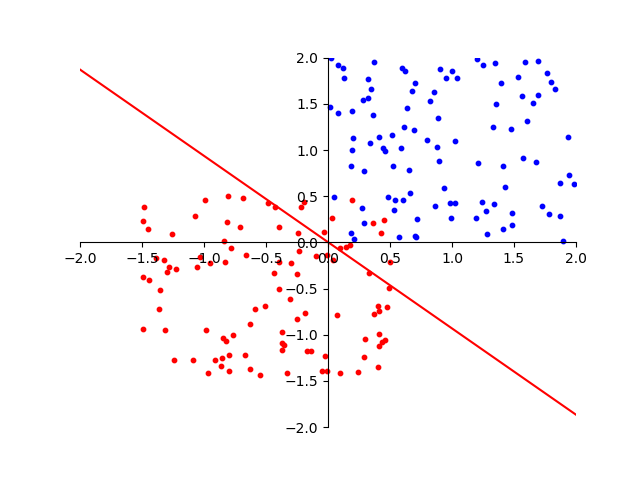

In [202]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
for x in a:
    plt.scatter(x[0],x[1], s=10, c="blue")
for x in b:
    plt.scatter(x[0],x[1], s=10, c="red")

wsp_a = -perc.wektor_wspol_w[1]/perc.wektor_wspol_w[2]
wsp_b = -perc.wektor_wspol_w[0]/perc.wektor_wspol_w[2]

x = np.linspace(-2,2,100)
plt.plot(x, wsp_a*x+wsp_b, '-r', label='y=2x+1')
plt.show()

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

In [14]:
a3 = np.random.rand(4,5,3)
a3

array([[[0.2279064 , 0.18382647, 0.31299768],
        [0.35839926, 0.53575213, 0.16421228],
        [0.27683172, 0.03485633, 0.60469156],
        [0.98451113, 0.86474253, 0.73042491],
        [0.75775089, 0.03447359, 0.75614037]],

       [[0.73056131, 0.36065978, 0.17907328],
        [0.46396853, 0.01221965, 0.78693281],
        [0.51362376, 0.91823099, 0.5220699 ],
        [0.3376267 , 0.59965116, 0.96687496],
        [0.67390138, 0.89660539, 0.67293815]],

       [[0.55572957, 0.76108657, 0.19494884],
        [0.26958649, 0.63890079, 0.66673351],
        [0.20953778, 0.64076919, 0.65900062],
        [0.82969989, 0.79819716, 0.82231363],
        [0.48261752, 0.94950765, 0.48493047]],

       [[0.69612027, 0.94838833, 0.97041349],
        [0.96885725, 0.56867069, 0.38899006],
        [0.86223991, 0.874103  , 0.53837817],
        [0.50286396, 0.68186697, 0.96253111],
        [0.70651879, 0.81410681, 0.04146841]]])

In [18]:
for a in a3[1]:
    print(a[1])
    print()

0.3606597834636849

0.012219646055341982

0.9182309858186429

0.5996511621366786

0.8966053921455814



<IPython.core.display.Javascript object>


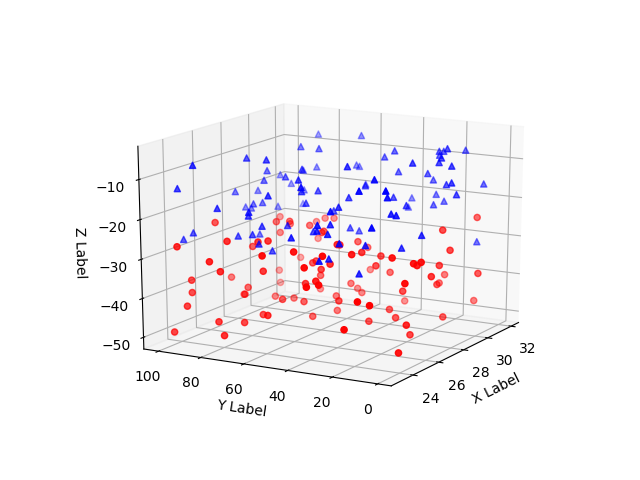

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

<IPython.core.display.Javascript object>


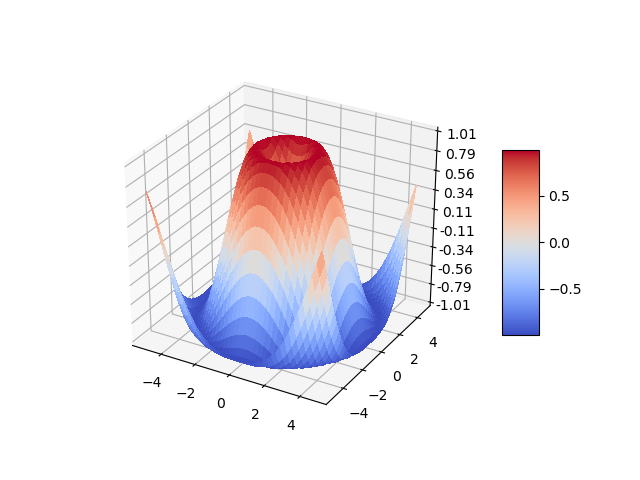

[[-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 ...
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]
 [-5.   -4.75 -4.5  ...  4.25  4.5   4.75]] [[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.75 -4.75 -4.75 ... -4.75 -4.75 -4.75]
 [-4.5  -4.5  -4.5  ... -4.5  -4.5  -4.5 ]
 ...
 [ 4.25  4.25  4.25 ...  4.25  4.25  4.25]
 [ 4.5   4.5   4.5  ...  4.5   4.5   4.5 ]
 [ 4.75  4.75  4.75 ...  4.75  4.75  4.75]]


In [20]:
'''
======================
3D surface (color map)
======================

Demonstrates plotting a 3D surface colored with the coolwarm color map.
The surface is made opaque by using antialiased=False.

Also demonstrates using the LinearLocator and custom formatting for the
z axis tick labels.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
print(X,Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()
